## Homework 3 (10 points)

### About the assignment

In this homework assignment, you will gain experience in data preparation and EDA (Exploratory Data Analysis) by getting closer to actually working with data using the tools you already know: numpy, pandas, matplotlib and seaborn.

You will be working with a credit scoring task (customer reliability assessment). You will be given data on 1000 clients, about whom about 20 attributes are known and a positive or negative score as a creditworthy person. This data will need to be prepared, examined (including visualization tools) and even try to propose some formula for a conditional assessment of customer reliability based on the provided data. Data description:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Each graph should be nicely organized - for this purpose it is required at least to indicate its name, as well as to note what is depicted on each of the axes.
Also, a short comment with conclusions is expected for each graph.

*Functions that may be useful for graph design: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1220]:
import pandas as pd
import numpy as np

### Assignment 1 (0.0 poins)

Use pandas to read the data file from https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Output basic table representation (first 5 and last 5 rows, size).

In [1221]:


data = pd.read_csv('german_credit.csv')

In [1222]:
df = data.copy()

In [1223]:
df.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [1224]:
df.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [1225]:
df.shape

(1000, 21)

### Assignment 2 (0.5 балла)

Determine if there are any omissions in the data. Divide attributes into quantitative, binary, ordinal, and categorical.

In [1226]:
df.isnull().sum().sum()

0

We find ordinal manually

In [1228]:
numeric = []
categorical = []
ordinal = []
binary = [] 
colu = df.columns
for col in colu:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numeric.append(col)
    elif len(df[col].unique()) == 2:
        binary.append(col)
    else:
        categorical.append(col)

In [1229]:
for i in ["savings", "employment_duration", "installment_rate", "present_residence", "number_credits"]:
    categorical.remove(i)
    ordinal.append(i)

### Assignment 3 (0.5 points)

Output the average loan amount (amount column) in each category (purpose column) using the groupby method.

In [1230]:
df.groupby(by = 'purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Assignment 4 (0.5 points)


What percentage of clients under 30 (age column) rent (housing column)? And what percentage of clients over 40 years of age rent housing?

In [1231]:
df_30 = len(df.loc[df['age'] < 30])
df_30_rent = len(df.loc[(df['age'] < 30) & (df['housing'] == 'rent')])
print((df_30_rent/df_30)*100,'процентов клиентов младше 30 снимают жилье.')
df_40 = len(df.loc[df['age'] >40])
df_40_rent = len(df.loc[(df['age'] > 40) & (df['housing'] == 'rent')])
print((df_40_rent/df_40)*100,'процентов клиентов старше 40 снимают жилье.')



66.66666666666666 процентов клиентов младше 30 снимают жилье.
68.01470588235294 процентов клиентов старше 40 снимают жилье.


### Assignment 5 (0.5 балла)

How many foreigners (foreign_worker) have a number of credits (number_credits) greater than 3?

In [1232]:
len(df.loc[(df['foreign_worker']== 'yes') & ((df['number_credits'] == '4-5') | (df['number_credits'] =='>= 6'))])

1

### Assignment 6 (1 point)

In [1233]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using numpy and matplotlib, let's start with a practice: graph the functions $sin(x)$ and $cos(x)$ from $-\pi$ to $\pi$ from 100 points with a legend and a grid. Use different colors for the lines, let one of them be a dashed line. The result in this and the following graphing tasks should look like the picture. The content of the captions should not necessarily be the same, but meaningful captions should be present on the graphs.

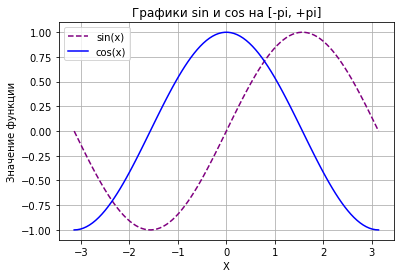

In [1234]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y_sin, label='sin(x)', linestyle='--', color = 'purple')
ax.plot(x, y_cos, label='cos(x)', color = 'blue')
plt.title("Графики sin и cos на [-pi, +pi]")
ax.legend()
ax.grid()
plt.xlabel("X")
plt.ylabel("Значение функции")
plt.show()


### Assignment 7 (1 point)

Consider the comparative number of positive and negative cases depending on the size of the current account. Construct mirror horizontal histograms.

In [1235]:
good = df.loc[df["credit_risk"]=="good", "status"].sort_values()
bad = df.loc[df["credit_risk"]=="bad", "status"].sort_values()

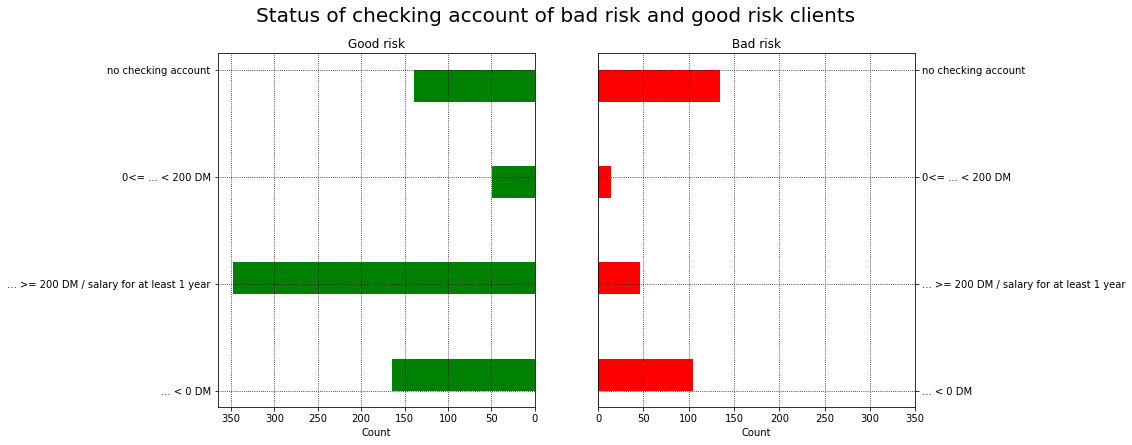

In [1236]:

fig, (ax1, ax2) = plt.subplots(1,2)
plt.xlim(0, 350)
fig.set_size_inches(12.5, 6.5)
fig.suptitle("Status of checking account of bad risk and good risk clients", size = 20)

ax1.set_title("Good risk")
ax1.hist(good,orientation="horizontal", color="green")
ax1.set_xlabel('Count')
ax1.grid(linestyle=':', color = 'black')
ax1.invert_xaxis()

ax2.set_title("Bad risk")
ax2.hist(bad, orientation="horizontal", color="red")
ax2.set_xlabel('Count')
ax2.grid(linestyle=':', color = 'black')
ax2.yaxis.tick_right()


### Assignment 8  (0.5 points)

In [1237]:
import seaborn as sns

Now construct a histogram to compare the number of positive and negative cases depending on the size of the savings account using seaborn. Which method do you like better in terms of labor-intensive code writing? And in terms of the perception of the result?

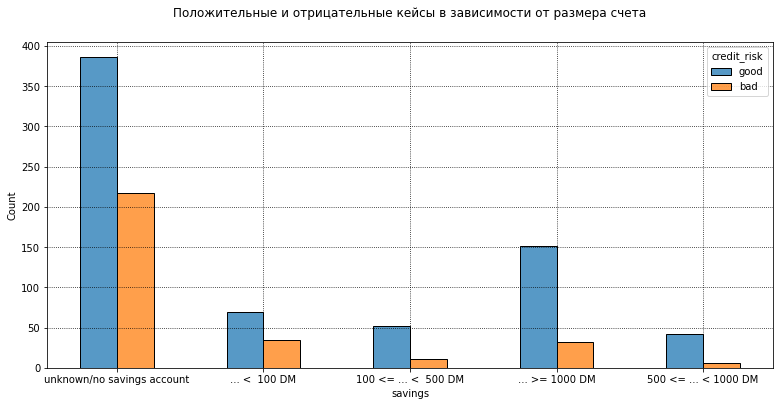

In [1238]:
plt.figure(figsize=(13, 6))
sns.histplot(df, x="savings",hue="credit_risk",kde = False, multiple="dodge", shrink =0.5)
plt.title('Положительные и отрицательные кейсы в зависимости от размера счета', pad = 25)
plt.grid(linestyle=':', color = 'black')


### Assignment 9  (1 point)

seaborn makes it easy to add even more information to a single graph. For each savings account size, we can estimate not only the number of positive and negative cases, but also their distribution by age, for example. Build an appropriate visualization for this.

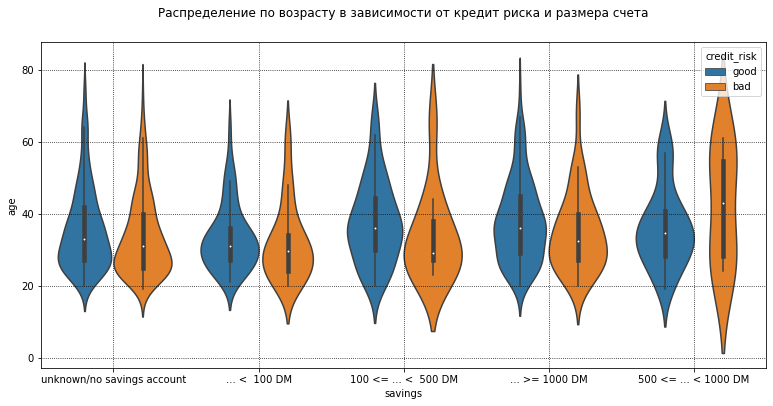

In [1239]:
plt.figure(figsize=(13,6))
sns.violinplot(data = df,x="savings", y="age", hue="credit_risk", shrink=0.5)
plt.title('Распределение по возрасту в зависимости от кредит риска и размера счета', pad =25)
plt.grid(linestyle=':', color = 'black')

### Assignment 10  (0.5 points)

Finishing with the histograms, let's look at the distribution of positive and negative cases by age, placing them on top of each other. Let's add the distribution of all loans taken out.

In [1240]:
good1 = df.loc[df["credit_risk"]=="good"]
bad1 = df.loc[df["credit_risk"]=="bad"]

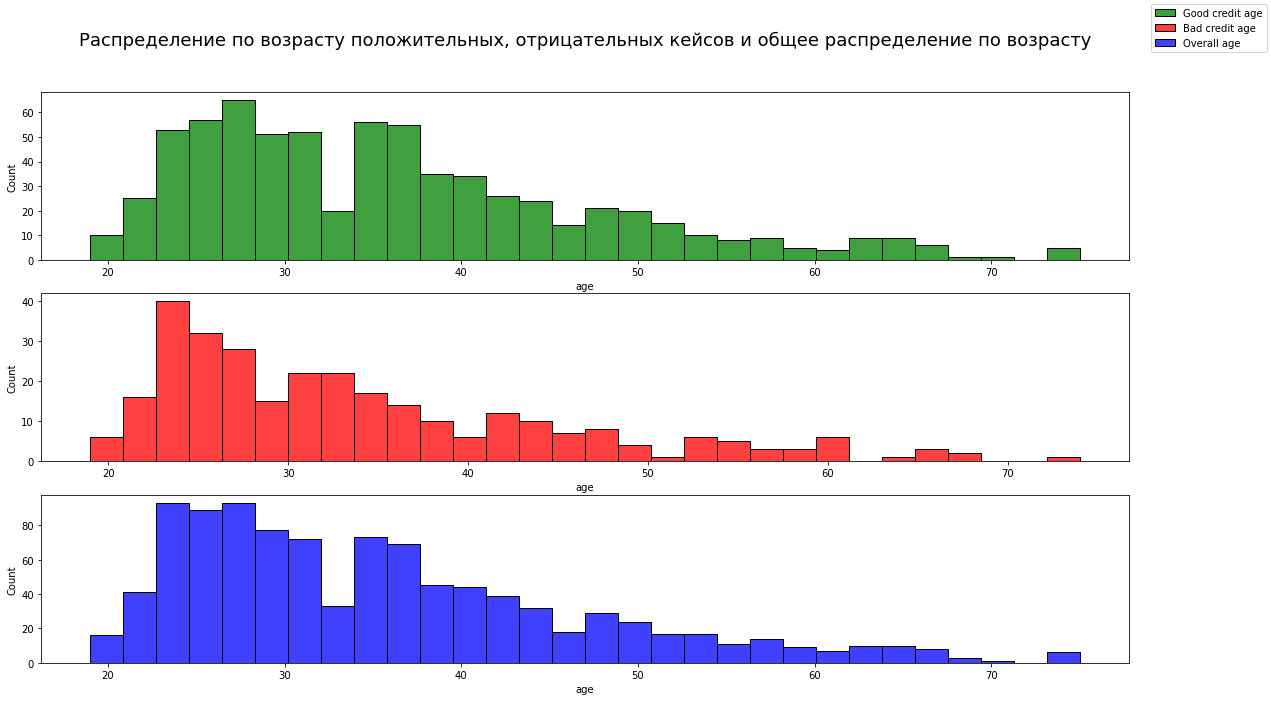

In [1241]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_size_inches(19.5, 10.5)
sns.histplot(good1, x="age", ax=ax1, color = 'green', bins=30, label="Good credit age")
sns.histplot(bad1, x="age", ax=ax2, color='red', bins=30, label="Bad credit age")
sns.histplot(data=data, x="age", ax=ax3,color = 'blue', bins=30, label="Overall age")
plt.title('Распределение по возрасту положительных, отрицательных кейсов и общее распределение по возрасту',pad = 450, fontdict = {'fontsize' : 18})
fig.legend()

                            

### Assignment 11  (0.5 points)

Equally useful sometimes can be a scatter diagram. Construct such a diagram with duration and credit sizes as axes. Mark the positive and negative cases with different colors.

Text(0.5, 1.02, 'Диаграмма рассеяния по duration и credit amount')

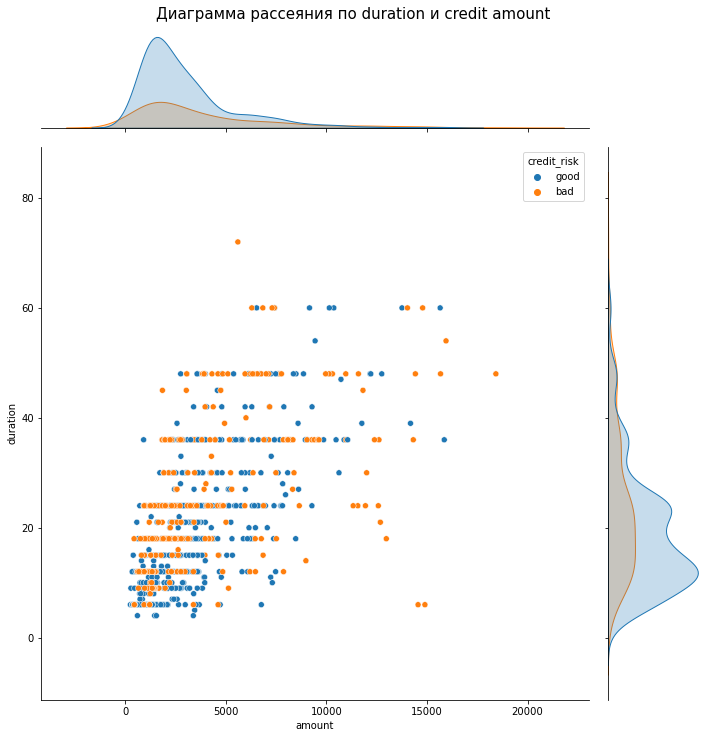

In [1242]:

p = sns.jointplot(data = df, x="amount", y="duration", hue="credit_risk", height = 10)
p.fig.suptitle("Диаграмма рассеяния по duration и credit amount", size = 15, y = 1.02)

### Assignment 12  (1 point)

Let's go deeper. Build a 3D version of the scatter diagram by adding an axis with age.

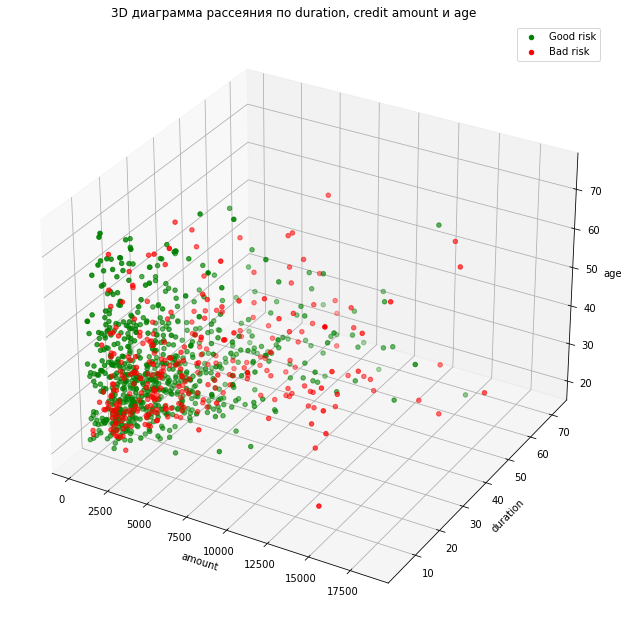

In [1243]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (14, 11))
ax = fig.add_subplot(111, projection='3d')
scatter1 = ax.scatter(df.loc[df['credit_risk']=='good', 'amount'],
                      df.loc[df['credit_risk']=='good', 'duration'], 
                      df.loc[df['credit_risk']=='good', 'age'],
                      c = 'green', label = 'Good risk')
scatter2 = ax.scatter(df.loc[df['credit_risk']=='bad', 'amount'],
                      df.loc[df['credit_risk']=='bad', 'duration'], 
                      df.loc[df['credit_risk']=='bad', 'age'],
                      c = 'red', label = 'Bad risk')
ax.set_xlabel('amount')
ax.set_ylabel('duration')
ax.set_zlabel('age')
fig.suptitle('3D диаграмма рассеяния по duration, credit amount и age', y=0.9)
plt.legend()

### Assignment 13  (0.5 points)

Represent all ordinal and binary features as numeric values {0, ..., n - 1}, where n is the number of feature values. Get rid of categorical attributes.

In [1244]:
from sklearn.preprocessing import  LabelEncoder

In [1245]:
#закодируем порядковые фичи самостоятельно, чтобы значения нумеровались по возрастанию, так сказать
df["savings"] = df["savings"].map({"unknown/no savings account": 0,"... <  100 DM": 1, "100 <= ... <  500 DM":2, 
                                   "500 <= ... < 1000 DM":3, "... >= 1000 DM":4})
df["employment_duration"] = df["employment_duration"].map({"unemployed":0, "< 1 yr": 1, "1 <= ... < 4 yrs":2,
                                                           "4 <= ... < 7 yrs":3, ">= 7 yrs":4})
df["installment_rate"] = df["installment_rate"].map({"< 20":0,"20 <= ... < 25": 1, "25 <= ... < 35":2, ">= 35":3})
df["present_residence"] = df["present_residence"].map({"< 1 yr":0, "1 <= ... < 4 yrs":1, "4 <= ... < 7 yrs":2, ">= 7 yrs":3})
df["number_credits"] = df["number_credits"].map({"1":0, "2-3":1, "4-5":2, ">= 6":3})
#для кодирования бинарных используем labelencoder, ну тут можно и one-hot encoding с удалением одной новой переменной
for feature in binary:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

df = df.drop(categorical, axis= 1)

In [1246]:
df['credit_risk'].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

In [1247]:
#1 - good risk, 0 - bad risk

### Assignment 14  (2 points)

Based on the results of the previous task, you should have a table in which all attributes are represented by numerical values in one way or another. Try to come up with a formula based on the data you have analyzed, linking the target variable to the attributes, without using ready-made machine learning tools. If you wish, you can exclude some more attributes, or, on the contrary, form new ones based on the existing ones. You may want to scale large sets of numerical values of some attributes using intervals. Goal: to implement a function that will take as input a set of features for a sample object and return a prediction of the target variable (0 or 1). For example, you could just add up all the attributes and return zero if the sum is negative and one otherwise. But surely you can come up with a better way!
The data is already divided into a training set, which you can use however you like, and a test set, on which you will need to check your accuracy. Try to achieve an accuracy of at least 0.6.

In [1248]:
df_test = df.copy()

My model will look like this: linear combination of features * coefficients, the sum obtained will be reduced to 1 or 0 (good risk, bad risk).
First of all, we need to bring all the fixtures to the same dimension, we use minmaxscaler for this purpose. 

In [1250]:
from sklearn.preprocessing import MinMaxScaler
df_test.loc[:, :] = MinMaxScaler().fit_transform(df_test)

Now we need to understand where to get the coefficients from. Coefficients are parameters of the significance of features for the total result, it is a logical idea to look at correlation and use correlation coefficients as coefficients in the model, but for the accuracy of the result we look at the correlation on the train sample.

In [1252]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df_test.drop('credit_risk', 1).values
y = df_test['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

C:\Users\user\AppData\Local\Temp\ipykernel_20888\3107128613.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_test.drop('credit_risk', 1).values


In [1253]:
correlations = []
for i in range(X_train.shape[1]):
    correlations.append(np.corrcoef(X_train[:, i],  y_train)[0,1])

If the resulting value of the product of the vector of weights and the vector of values > 0, we predict as 1 (good risk), if less, we predict as 0 (bad risk). 

In [1255]:
def predict(Xtest):
    x = np.dot(Xtest, correlations)
    tozeroone = lambda t: t>=0
    return np.array([tozeroone(xi) for xi in x])



In [1256]:
#скор на тесте 0.7
accuracy_score(y_test, predict(X_test))

0.7

In [1257]:
#скор на трейне 0.7426666666666667
accuracy_score(y_train, predict(X_train))

0.7426666666666667